# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [20]:
#import the necessary libraries
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [21]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates = pd.date_range('2017-01-01', '2018-03-31')
len(dates)

455

In [22]:
# store the parameters
error = np.random.normal(0, 2, len(dates))
Y_0 = 8
mu = 5
phi = 0.7

In [23]:
# generate the time series according to the formula
TS = [None] * len(dates)

for i, row in enumerate(dates):
    TS[i] = mu + Y_0 * phi + error[i]
    Y_0 = TS[i] - mu

Plot the time series and verify what you see

Text(0.5, 1.0, 'Time Series')

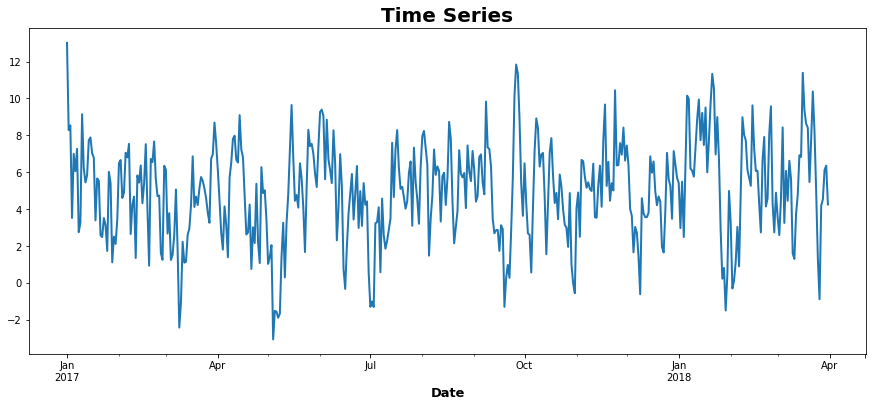

In [24]:
# plot here
series =  pd.Series(TS, index=dates)
series.plot(figsize=(15,6), linewidth=2)
plt.xlabel('Date', fontweight='bold', fontsize=13)
plt.title('Time Series', fontweight='bold', fontsize=20)

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

Text(0, 0.5, 'Autocorreation')

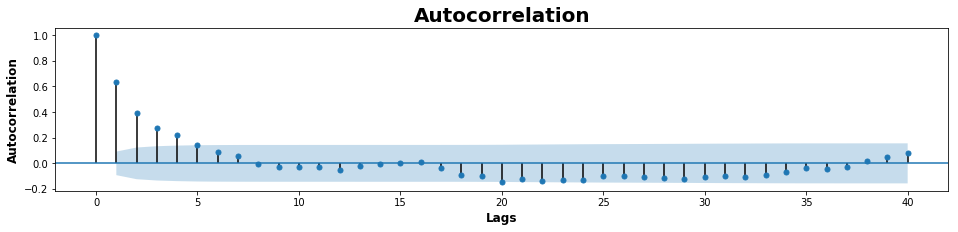

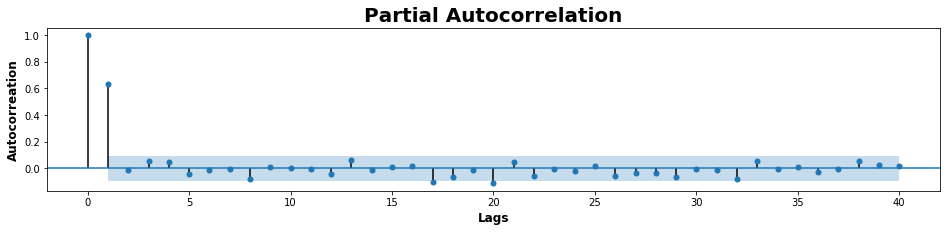

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series,ax=ax, lags=40);
plt.title('Autocorrelation', fontweight='bold', fontsize=20)
plt.xlabel('Lags', fontweight='bold', fontsize=12)
plt.ylabel('Autocorrelation', fontweight='bold', fontsize=12)


fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series,ax=ax, lags=40)
plt.title('Partial Autocorrelation', fontweight='bold', fontsize=20)
plt.xlabel('Lags', fontweight='bold', fontsize=12)
plt.ylabel('Autocorreation', fontweight='bold', fontsize=12)

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [26]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(series, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Fri, 17 May 2019   AIC                           1943.395
Time:                        07:12:57   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.y        0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [27]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range('2015-03-01', '2015-08-31')
len(dates)

# store the parameters
mu = 7
theta = 0.9

#generate the time series
TS = [None] * len(dates)
error_prev = error[0]
for i, row in enumerate(dates):
    TS[i] = mu + theta * error_prev + error[i]
    error_prev = error[i]

Text(0.5, 1.0, 'Time Series')

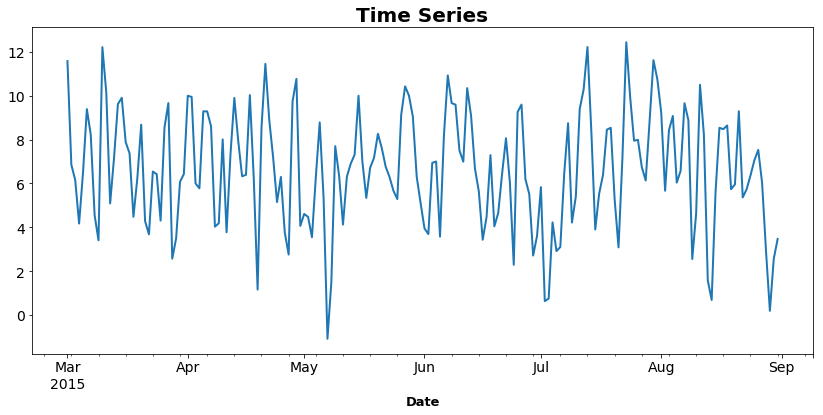

In [30]:
# Plot the time series
series_2 =  pd.Series(TS, index=dates)
series.plot(figsize=(14,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontweight='bold', fontsize=13)
plt.title('Time Series', fontweight='bold', fontsize=20)

## Look at the ACF and PACF of your model and write down your conclusions

Text(0, 0.5, 'Autocorreation')

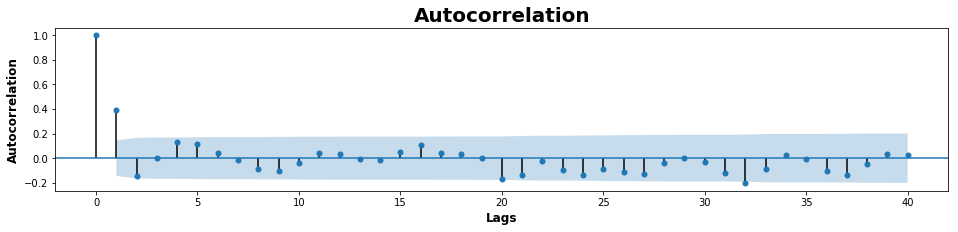

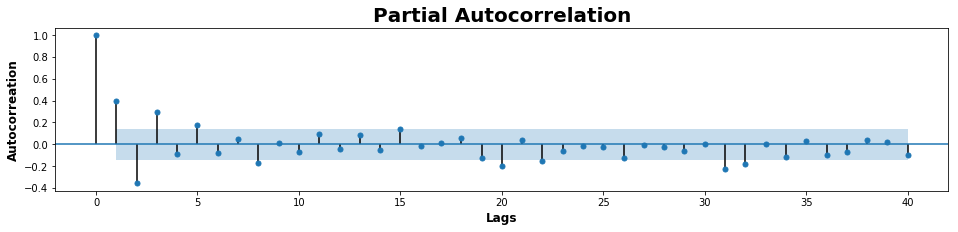

In [31]:
# ACF
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series_2, ax=ax, lags=40);
plt.title('Autocorrelation', fontweight='bold', fontsize=20)
plt.xlabel('Lags', fontweight='bold', fontsize=12)
plt.ylabel('Autocorrelation', fontweight='bold', fontsize=12)

# PACF
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series_2, ax=ax, lags=40)
plt.title('Partial Autocorrelation', fontweight='bold', fontsize=20)
plt.xlabel('Lags', fontweight='bold', fontsize=12)
plt.ylabel('Autocorreation', fontweight='bold', fontsize=12)

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [32]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(series_2, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  184
Model:                     ARMA(1, 0)   Log Likelihood                -424.328
Method:                       css-mle   S.D. of innovations              2.427
Date:                Fri, 17 May 2019   AIC                            854.655
Time:                        07:16:47   BIC                            864.300
Sample:                    03-01-2015   HQIC                           858.564
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6408      0.297     22.355      0.000       6.059       7.223
ar.L1.y        0.3998      0.068      5.851      0.000       0.266       0.534
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [33]:
data = pd.read_csv("winning_400m.csv")
data.head()

,year,winning_times
0,1900,49.4
1,1904,49.2
2,1908,50.0
3,1912,48.2
4,1920,49.6


In [35]:
type(data.year[0])

numpy.int64

In [36]:
data.year = data.year.astype(str)
data.year = pd.to_datetime(data.year.astype(str))
col_name= 'year'
data.set_index(col_name, inplace=True)

Plot the data

Text(0.5, 1.0, 'Winning 400m Time Series')

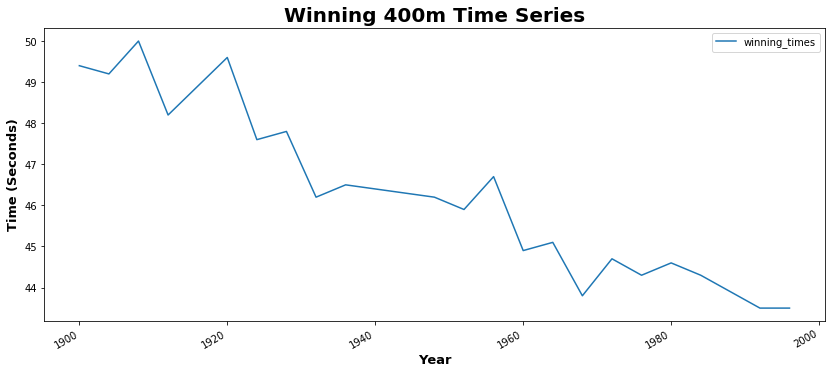

In [41]:
# your code here
data.plot(figsize=(14,6))
plt.xlabel('Year', fontweight='bold', fontsize=13)
plt.ylabel('Time (Seconds)', fontweight='bold', fontsize=13)
plt.title('Winning 400m Time Series', fontweight='bold', fontsize=20)

Difference the data (detrend) to get a stationary time series. Make sure to remove the first NaN value.

In [49]:
data_diff = data.diff().dropna()
data_diff.head(10)

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0
1928-01-01,0.2
1932-01-01,-1.6
1936-01-01,0.3
1948-01-01,-0.3


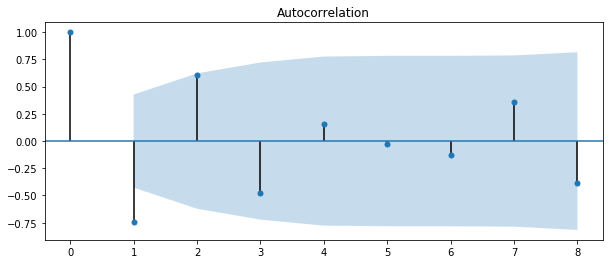

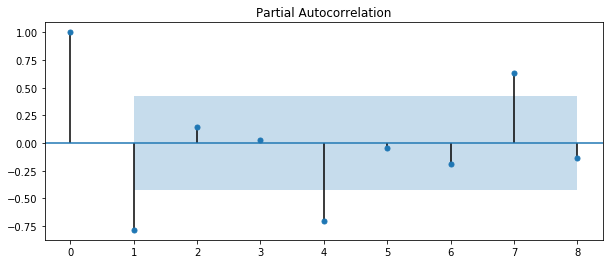

In [46]:
# ACF 
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(data_diff, ax=ax, lags=8);

# PACF
fig, ax = plt.subplots(figsize=(10,4))
plot_pacf(data_diff, ax=ax, lags=8);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [47]:
# ARMA(2, 1)
mod_arma = ARMA(data_diff, order=(2, 1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Fri, 17 May 2019   AIC                             47.911
Time:                        07:22:46   BIC                             53.133
Sample:                             0   HQIC                            49.044
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.001      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_ti

In [48]:
# ARMA(2,2)
mod_arma = ARMA(data_diff, order=(2, 2))
res_arma = mod_arma.fit()

print(res_arma.summary())
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Fri, 17 May 2019   AIC                             44.943
Time:                        07:23:32   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.winning_ti

## What is your final model? Why did you pick this model?

It is first off important to note that the time series we used for these models is relatively short within a calendar year. This makes our model selection more difficult with limited data to work with. All three models we ran displayed suitable fits. ARMA models require fewer parameters so may be the best choice, but the results are not enough to isolate a clear first choice.

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.